In [1]:
from time import time
t0 = time()

In [2]:
import pandas as pd

In [3]:
ti = time()
from go import *
tii = time()
print(tii -ti)

Initializing database connection...
Database connected!
Getting data took 0 minutes, 0 seconds.
1.9127840995788574


In [4]:
# n.find_neighbours()
# uprn_counts = dict(n.uprn.street.value_counts())
# n.roads['uprn_counts'] = n.roads.id.apply(lambda x: uprn_counts.get(x, 0))
# n.roads['density'] = n.roads.uprn_counts / n.roads.length * 10
# n.roads['residential'] = n.roads.density > 0.5

In [5]:
n.nodes = n.db.contains('roadnodes', n.geom.buffer(1).wkt)

In [6]:
df = n.roads[['id','endNode','startNode']]

d1 = dict(zip(df.endNode, df.id))
d2 = dict(zip(df.startNode, df.id))

In [7]:
ta = time()
connections = dict()
for i in n.nodes.id.values:
    connections[i] = list()
    connections[i].extend(list(df.loc[df.startNode == i].id.values))
    connections[i].extend(list(df.loc[df.endNode == i].id.values))
tb = time()
print(tb -ta)

0.21880602836608887


In [8]:
n.nodes['conns'] = n.nodes.id.apply(lambda x: connections[x])

In [9]:
road_major = {'Secondary Access Road': 0,
             'Restricted Local Access Road': 1,
             'Local Road': 2,
             'B Road': 3,
             'Minor Road': 4,
             'A Road': 5,
             'Motorway': 6}

In [10]:
n.roads['major'] = n.roads.roadFunction.apply(lambda x: road_major[x])

In [11]:
road_type = dict(zip(n.roads.id, n.roads.major))

In [12]:
n.nodes['major'] = n.nodes.conns.apply(lambda x: max([road_type[r] for r in x]))

<AxesSubplot:>

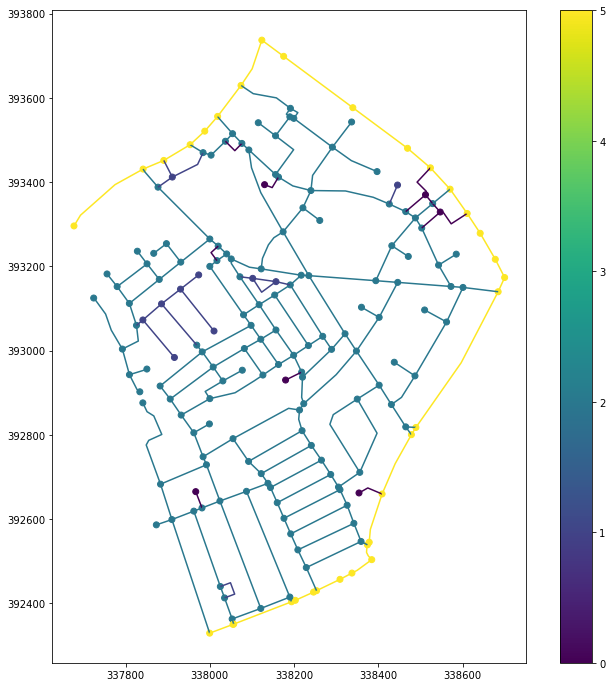

In [13]:
cmap='viridis'
f, ax = plt.subplots(figsize=(12,12))
n.roads.plot('major', ax=ax, legend=True, cmap=cmap)
n.nodes.plot('major', ax=ax, cmap=cmap)

In [14]:
t1 = time()
t = t1-t0
print(t)

3.113532543182373
